In [2]:
import numpy as np
import os,sys



sys.path.append('../../../RL_lib/Agents/PPO')
sys.path.append('../../../RL_lib/Utils')
sys.path.append('../..')
%load_ext autoreload
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/MarsLanding_3dof_v1/Run/Run_1km


In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

3-dof dynamics model
lander model apf
dvec vc 3
queue fixed
Flat Constraint


<IPython.core.display.Javascript object>


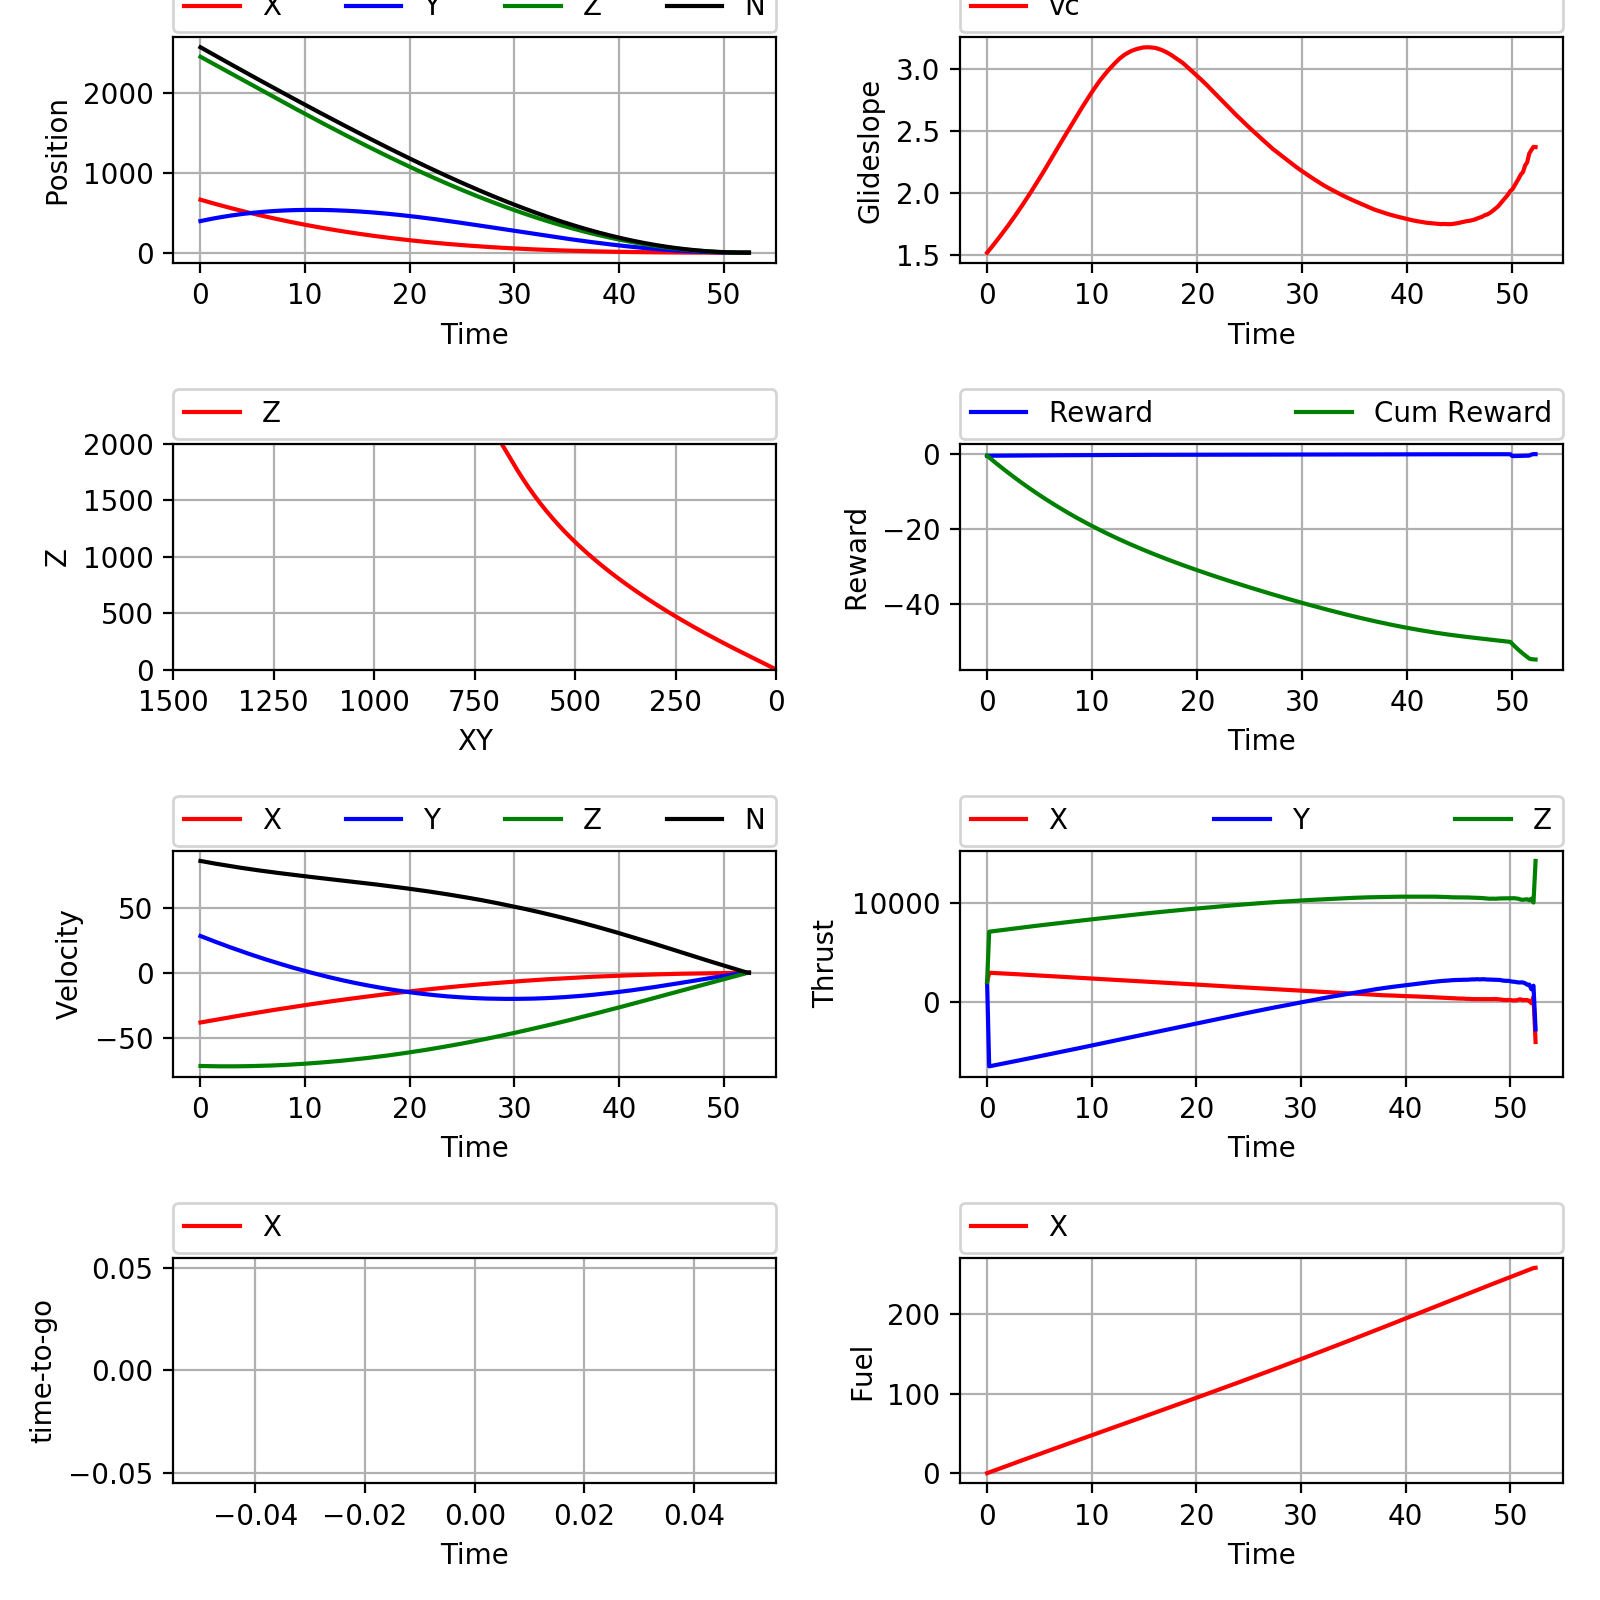

<IPython.core.display.Javascript object>


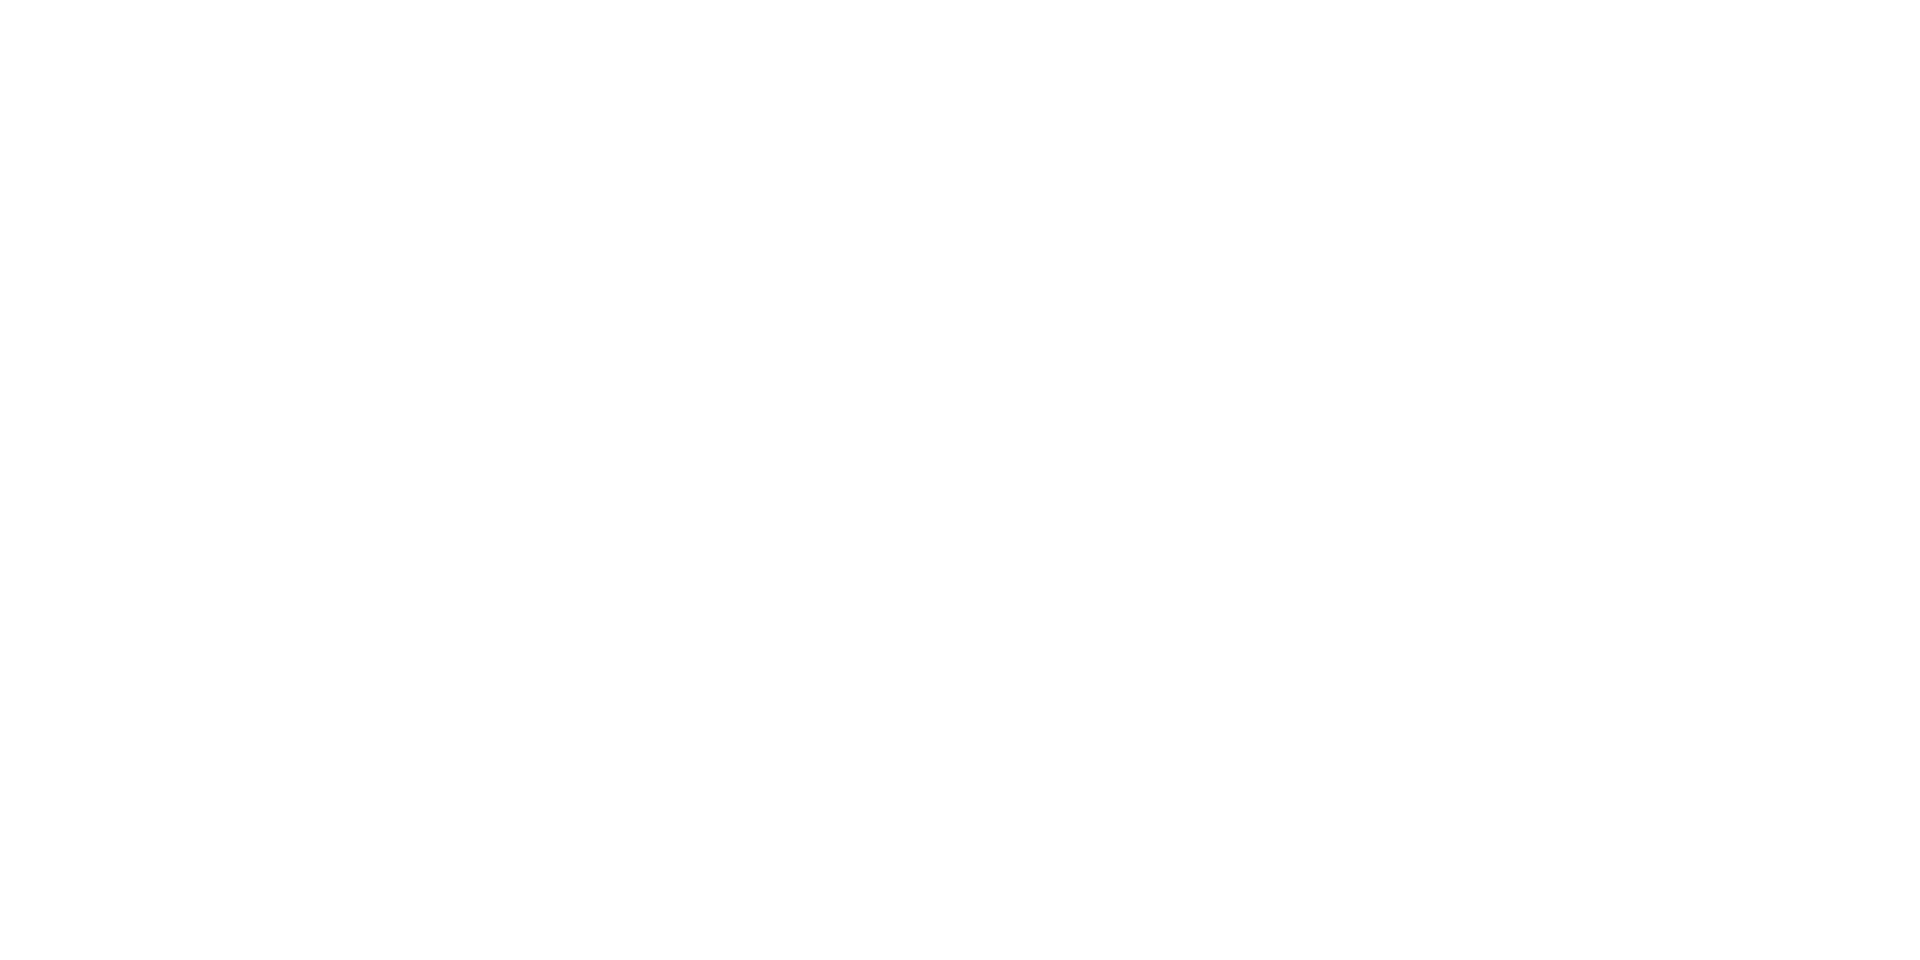

<IPython.core.display.Javascript object>


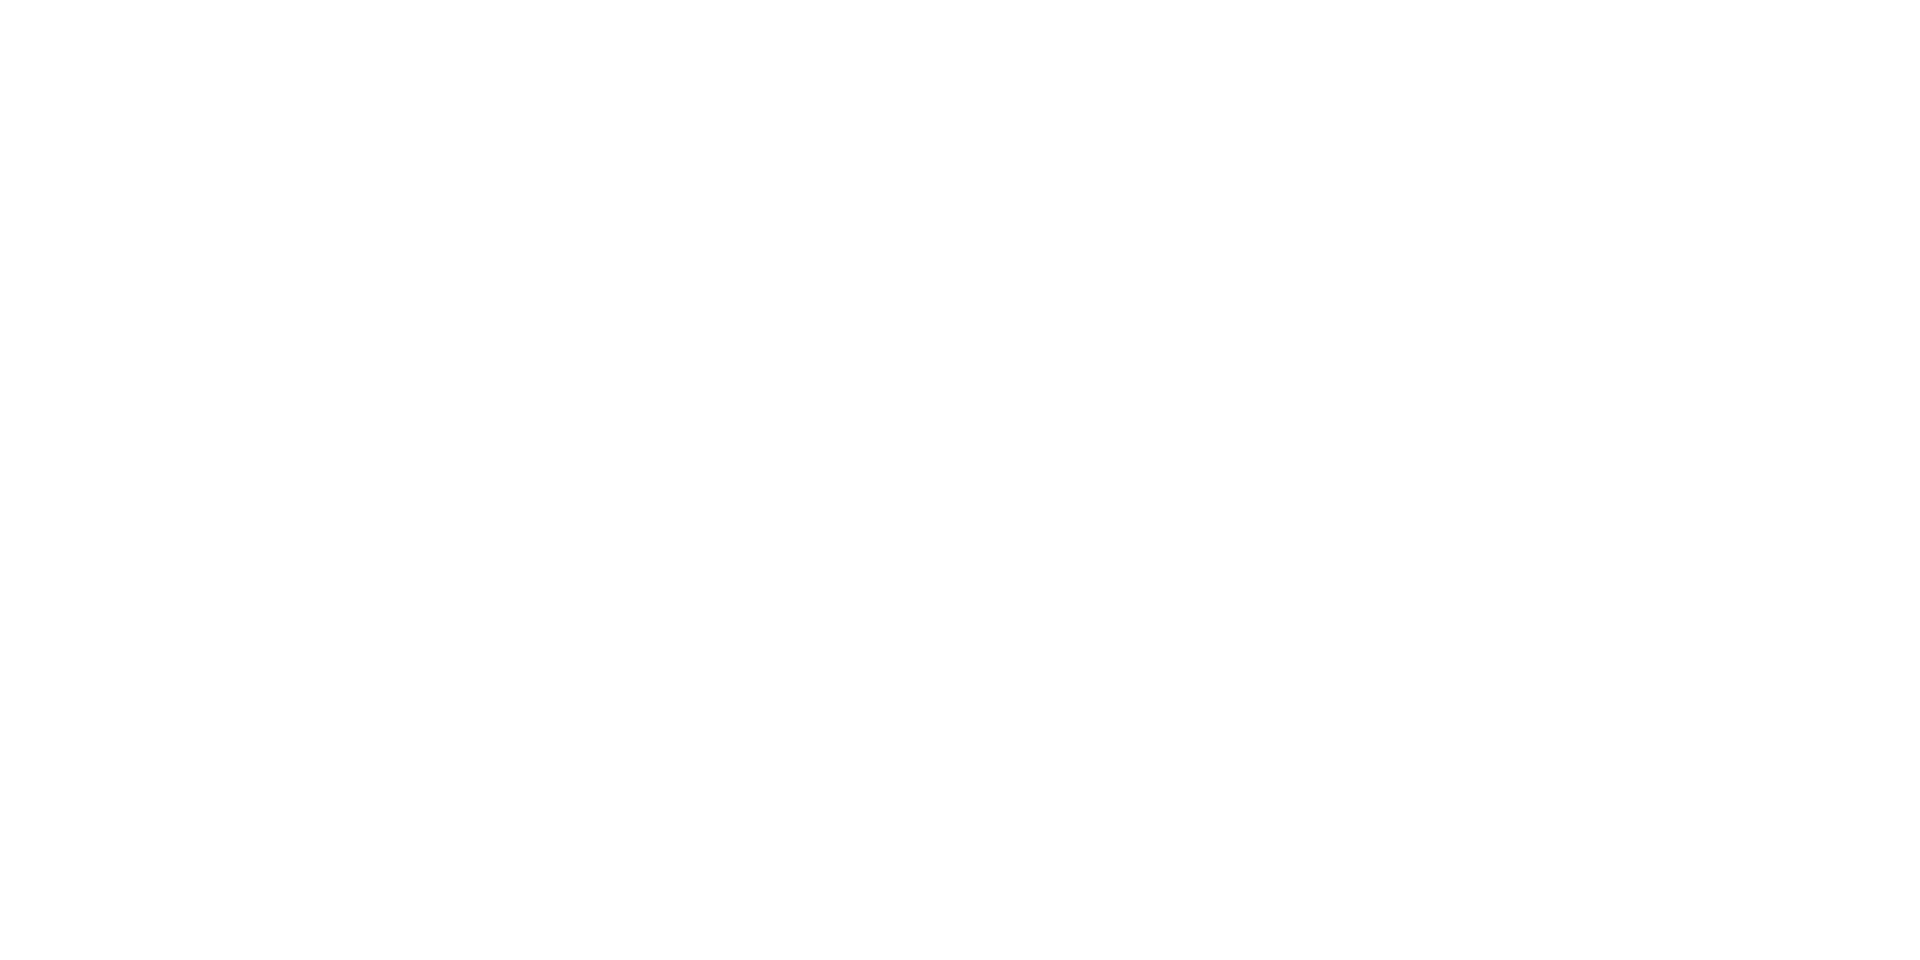

<IPython.core.display.Javascript object>


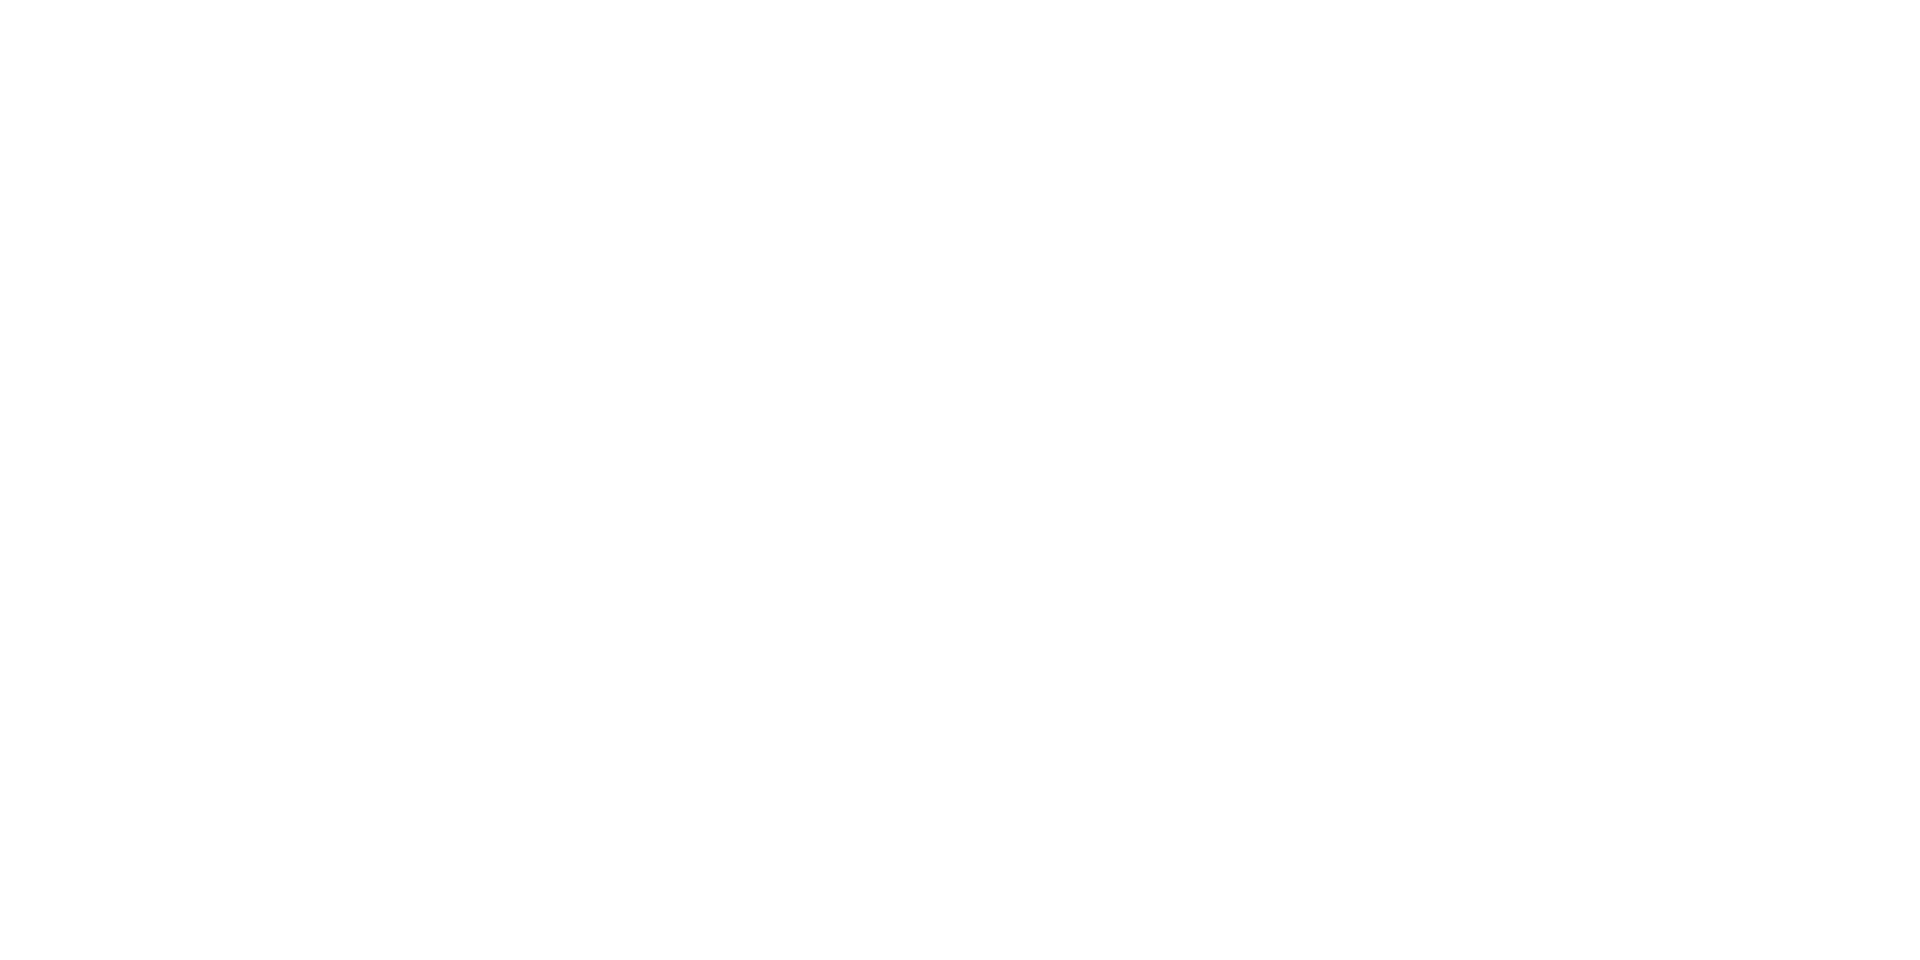

<IPython.core.display.Javascript object>


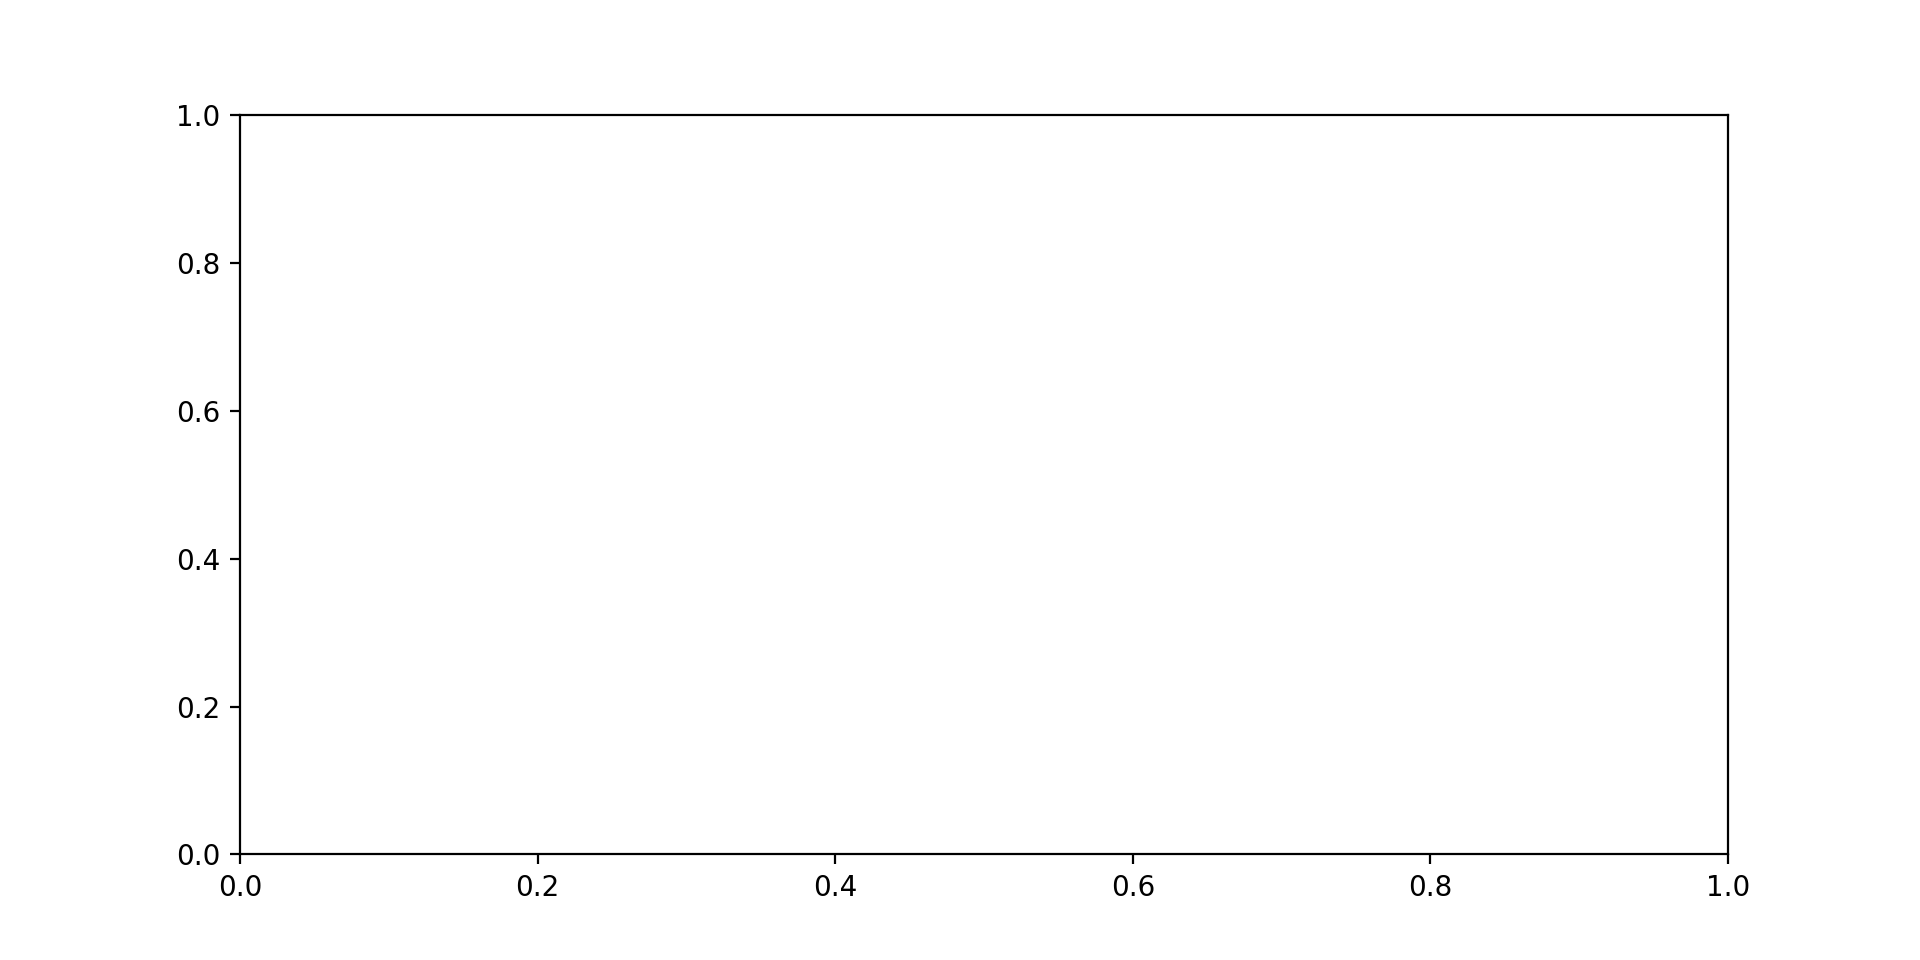

lander env new
Landing_icgen:
    downrange                   :  (0, 2000, -70, -10)
    crossrange                  :  (-1000, 1000, -30, 30)
    altitude                    :  (2400, 2600, -90, -70)
    adjust_apf_v0               :  True
262 0.0017860510401886444 0.12694501300658748


In [4]:
from env import Env
from dynamics_model import Dynamics_model
from reward import Reward
from lander_model import Lander_model
from flat_constraint import Flat_constraint

from glideslope_constraint import Glideslope_constraint
from ic_gen import Landing_icgen


from drdv_agent import DRDV_agent
from utils import Mapminmax,Logger

logger = Logger()

dynamics_model = Dynamics_model(h=0.05)

lander_model = Lander_model(use_trajectory_list=True)
lander_model.get_state_agent = lander_model.get_state_agent8
#lander_model.max_thrust=55000
reward_object = Reward()
glideslope_constraint = Glideslope_constraint(gs_limit=0.0)
#shape_constraint = Parabaloid_constraint(altitude=500,debug=False)
shape_constraint = Flat_constraint()
env = Env(lander_model,dynamics_model,logger,
          reward_object=reward_object,
          glideslope_constraint=glideslope_constraint,
          shape_constraint=shape_constraint,
          tf_limit=200.0,print_every=10,
          scale_agent_action=False)


env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.0,0.0),noise_u=100,noise_sd=100, #u=1000 breaks
                          downrange = (0,2000 , -70, -10), 
                           crossrange = (-1000,1000 , -30,30),  
                           altitude = (2400,2600,-90,-70))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()


In [6]:

pos,vel,traj=agent.test_batch(n=1000)

270 0.047997477270509965 0.13135761100255283
237 0.004527479425195905 0.22321836566478168
231 0.014721756901174641 0.2887087721964615
276 0.016518668095479614 0.3425989342784632
241 0.0008292375616698137 0.14321983938737623
253 0.01766177948602727 0.30842300718416965
280 0.004695983190035886 0.11494532817752419
299 0.0065476702723678325 0.15293073021111933
274 0.014199452698486032 0.29549490575435183
256 0.008849654501998658 0.1246262305055771
256 0.02512361561824659 0.6930047509485633
275 0.00929127507000643 0.3399909621351269
271 0.002634368241652514 0.4198001653022237
255 0.0044408619706089066 0.08562262531626672
270 0.03330743963162968 0.9202892408593767
252 0.057090404332982896 0.5713633900803772
265 0.004560364003298132 0.06266003788524954
259 0.023111650673698306 0.7105157073674239
256 0.012718774447996083 0.48438953864253226
237 0.0024219364710998297 0.08623208442722431
258 0.03585438924828353 0.9042703061588915
280 0.017315014481520136 0.29706880560453414
264 0.026101591764738

299 0.0822896483120233 1.143703822285855
239 0.01780597966819235 0.31133703542730845
232 0.006191492812792257 0.20876797140128633
263 0.003147599561973057 0.15290101329135009
248 0.07036942049697092 0.5861817256604793
256 0.015090706072615706 0.7062833385644067
274 0.035343785743313524 0.9412777914843526
266 0.07022443390116631 0.18106815095396542
253 0.016197923653935114 0.29777678916370776
235 0.02536910419372667 0.7277628566411047
282 0.028141921026034616 0.5803168871393567
268 0.01699389617057453 0.4776040618966782
257 0.013640042422250866 0.20586833355582504
239 0.005987255113870956 0.11326414230141078
242 0.010158906324437212 0.3399767823613231
253 0.0191373869805928 0.37108135408422527
238 0.00906169536998593 0.2295469088929701
238 0.008032696514141053 0.1256489982237196
243 0.003444808939291619 0.06448600245131701
233 0.025094954013952803 0.6871604616525785
266 0.0032929926666355087 0.15922606055057612
271 0.008908991704618827 0.18063197359003696
260 0.014858825172156512 0.2700

284 0.02508733118309774 0.7096854679197373
240 0.024241679027211267 0.6909241626747304
261 0.017858706073022992 0.31127202435113277
263 0.02027660120439095 0.2782029410895552
253 0.005085076028860648 0.09557907553700283
311 0.015091359654982596 0.21514461113775785
271 0.0073772638219066124 0.36046233486348794
256 0.022208691892342678 0.2882592709998097
288 0.011223793609734765 0.36321601563203687
252 0.01234056596385028 0.21691150678754004
247 0.005420843008768717 0.2159762937985411
267 0.06256233910392456 0.5783104513328234
247 0.047115745116348626 0.6715836140333815
255 0.00746795623529634 0.10464673362025297
314 0.024431165342266872 0.5280327248083392
238 0.02483285571252885 0.4037893031080501
267 0.014740022871461735 0.3473130613125947
278 0.013777371587640953 0.8851440266628787
237 0.004427767772211534 0.22950531793509193
250 0.005986203731813197 0.08749524428105672
267 0.026581407162286064 0.4830749959950291
238 0.03400216376606452 0.9196134267708016
241 0.005881861907205587 0.18

245 0.0199113219173057 0.32334174118744224
247 0.01150414072955981 0.4133586638939255
292 0.030121921749137498 0.7356260137723161
245 0.007398562717412985 0.10239342078630037
239 0.010669990707086238 0.19960196736569832
246 0.007213475888814623 0.4170677084708398
247 0.007600810706610545 0.23041721943446544
290 0.024716568713582635 0.32296563031005265
268 0.05610315946084408 1.0712817931148153
285 0.013514420545531156 0.29074914182316847
289 0.02775546089427013 0.5816804119802054
280 0.0399820713073024 0.9555931018248148
284 0.021600731857295028 0.35128495094029744
297 0.0023829506329939897 0.3822606927115606
262 0.016753324389360055 0.26622222661478423
272 0.01682600994424364 0.5259166959527929
261 0.010151489760956563 0.18990486527295594
255 0.011054045293530164 0.23992499439535178
249 0.0051052757374099155 0.17039957356580324
254 0.013497746919369913 0.39141255185741014
252 0.004891326121920499 0.15900815829181308
284 0.0019993423097990127 0.4002040250588656
277 0.03217252777140301 

272 0.003203867029242208 0.4985680543351062
281 0.013094705770076315 0.25576046657160856
232 0.02781425239233202 0.9343579223900669
236 0.01903114375284929 0.35735405939429354
314 0.01285724680421329 0.5786541458560301
242 0.017136297880053497 0.29464055773691744
268 0.005946275158532883 0.35038059271738436
271 0.002592987354689789 0.1458911030937226
283 0.022052832338118087 0.29814529317721244
264 0.0499708187531691 0.9999847787449935
279 0.013668347461211258 0.28971932473537765
275 0.02090432735779452 0.3190893388604254
271 0.007338204422920602 0.15359520675276583
275 0.02215014894107211 0.2923321890270388
260 0.006744123777058625 0.1857279452481708
311 0.005388739831263529 0.35925346476084924
247 0.009817647878150376 0.6438784783186563
267 0.007817470439334213 0.11911240866946035
285 0.014206391885137152 0.6815195919238799
281 0.02775719818166704 0.7470685457557572
248 0.02554281824791407 0.14430958845151506
240 0.029218606203741414 0.5346829328759185
253 0.002637290699858421 0.4023

299 0.0035322905908589477 0.36424603961892177
239 0.006890595482034245 0.1937706761915617
248 0.010190737519611952 0.15452316447273168
268 0.013611343948083646 0.46591919553296207
246 0.006471609842790977 0.49158539369186616
266 0.030293449781557298 0.9121419197505489
265 0.0051960054003446126 0.10906167797299522
248 0.009699418848503361 0.31888615816143984
303 0.042766335227270975 0.5528687673343973
253 0.01744849504722993 0.27919241662224675
267 0.01507775951209416 0.35945226422893595
245 0.0012838080018258583 0.40325750866321325
262 0.01985995354235553 0.39566204536223154
278 0.005222446193987707 0.3330707289501306
274 0.006916095285743865 0.10655551262480677
292 0.027056992008035012 0.6492145067909377
280 0.007759531835645588 0.13355867096760612
251 0.0020037639528179977 0.025724734880267424
236 0.006681750670464866 0.3370645131150325
282 0.05793365883112722 1.0412245008860725
255 0.012228716234575174 0.1870898540660355
269 0.023121373911531427 0.42881791672515346
260 0.00786775396

In [9]:
tl = lander_model.trajectory_list
print(len(tl))
pos = []
vel = []
fuel = []
gs = []
steps = []
for t in tl:
    pos.append(np.linalg.norm(t['position'][-1]))
    vel.append(np.linalg.norm(t['velocity'][-1]))
    fuel.append(np.linalg.norm(t['fuel'][-1]))
    gs.append(np.min(t['glideslope']))
    steps.append(len(t['position']))
print(np.max(pos), np.max(vel))
wc = np.argmax(pos)
print ('1: ',tl[wc]['position'][0])
print ('2: ',tl[wc]['velocity'][0])
print ('3: ',tl[wc]['position'][-1])
print ('4: ',tl[wc]['velocity'][-1])
print('mean fuel: ',np.mean(fuel))
print('std fuel: ',np.std(fuel))
print('min fuel: ',np.min(fuel))
print('max fuel: ',np.max(fuel))
print('min GS: ',np.min(gs))
print('mean steps: ',np.mean(steps))
print('max steps: ',np.max(steps))

1001
0.13751590932809268 1.143703822285855
1:  [1800.13826177 -609.1931634  2451.26516293]
2:  [-43.29885421  17.6737931  -74.94651043]
3:  [ 1.35902474e-01 -2.10033408e-02 -4.96593979e-05]
4:  [ 0.74630238 -0.11387772  0.00772103]
mean fuel:  261.0801559779264
std fuel:  13.814179251156999
min fuel:  232.7561742063217
max fuel:  316.55320785011236
min GS:  0.46937631770481
mean steps:  263.7152847152847
max steps:  322


In [11]:
foo = tl

1001
998


<IPython.core.display.Javascript object>


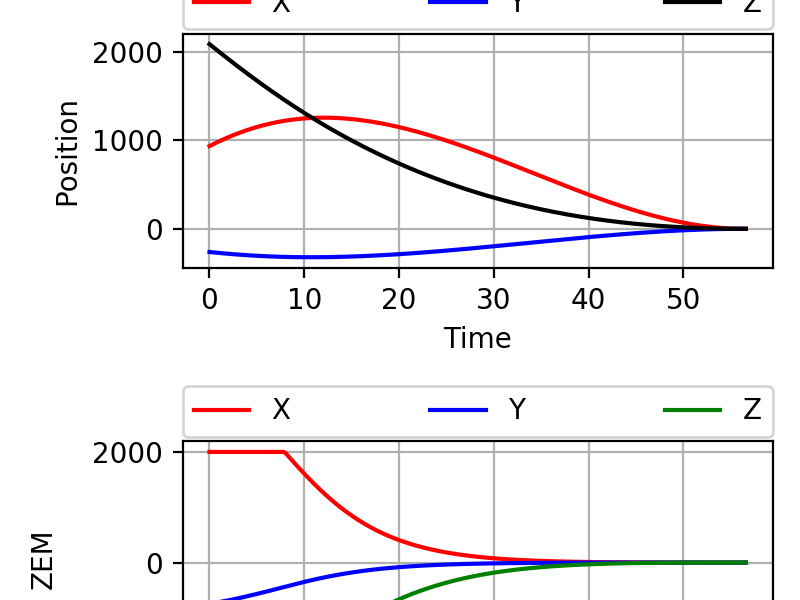

In [24]:
import env_utils as envu
npos = np.linalg.norm(pos,axis=1)
wc = np.argmax(npos)
envu.render_traj(traj[wc])

In [10]:
np.random.uniform(low=3,high=3)

3.0

Landing_icgen:
    downrange                   :  (1500, 1500, -70, -70)
    crossrange                  :  (-500, -500, -30, -30)
    altitude                    :  (2100, 2100, -90, -90)


<IPython.core.display.Javascript object>


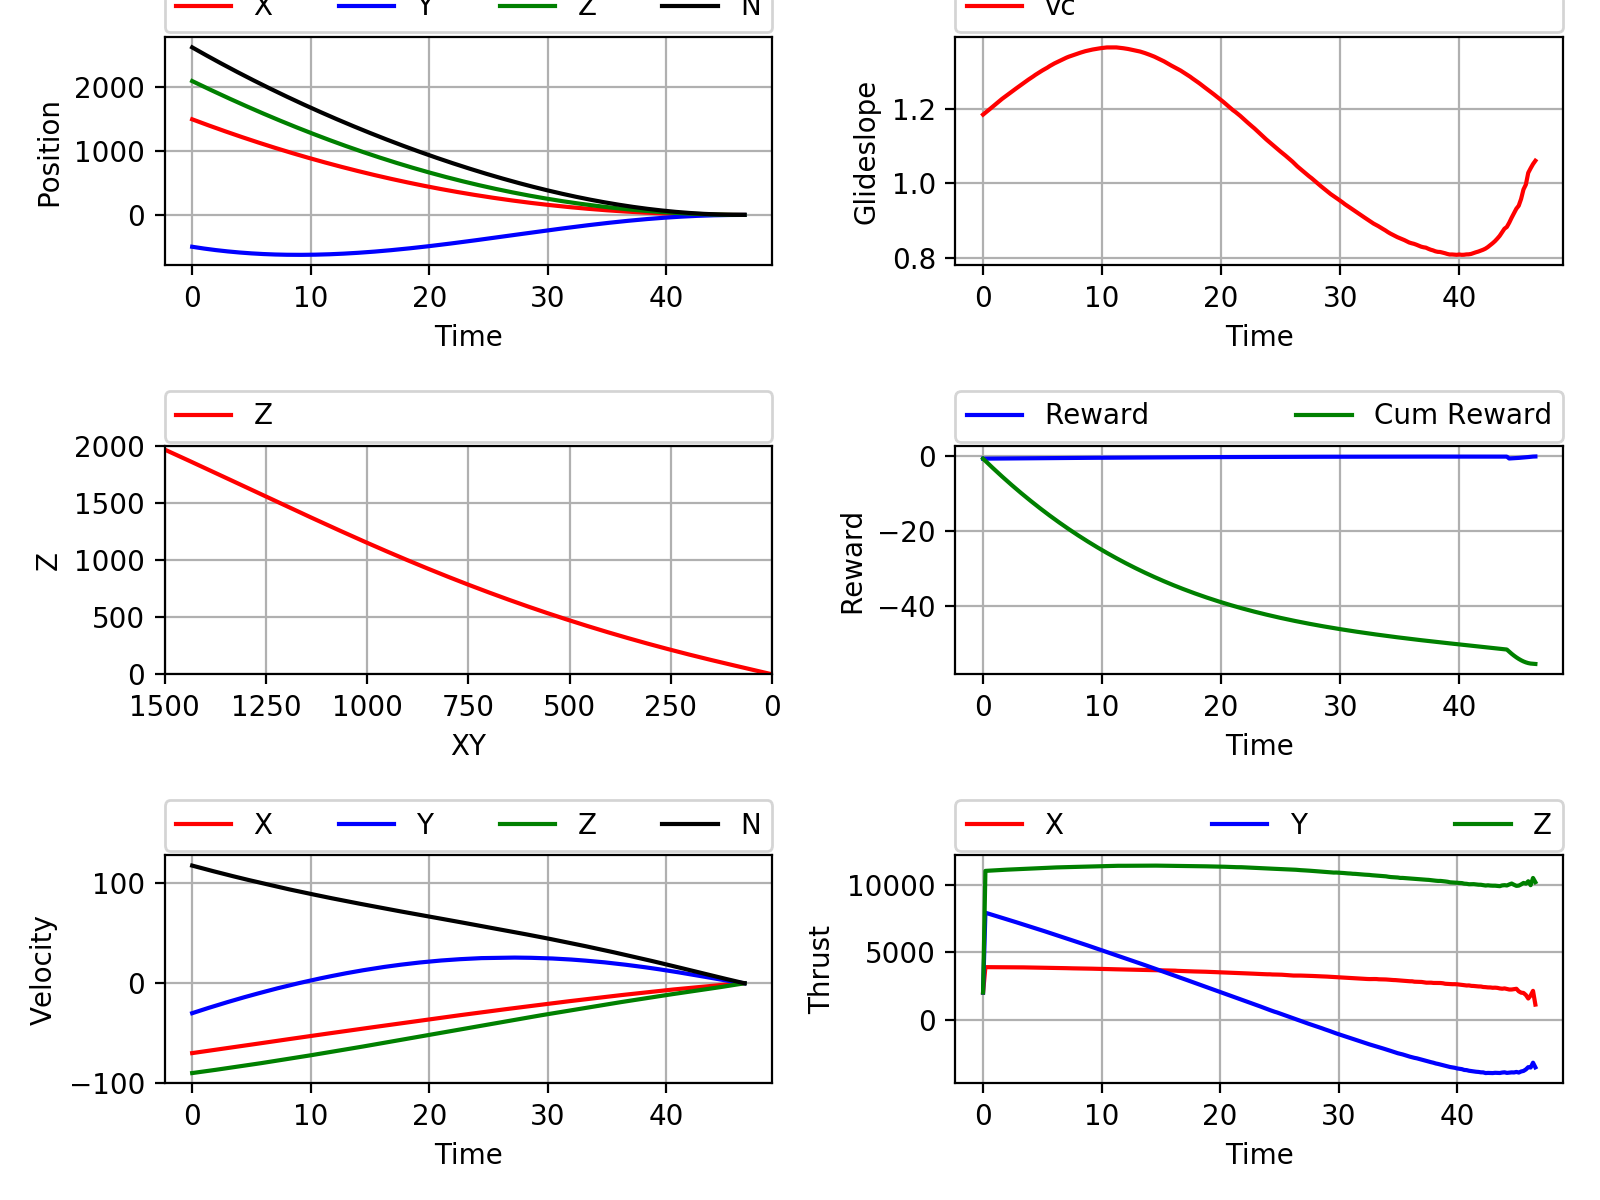

233 0.006176921753766272 0.08812700162431006


In [6]:
env.ic_gen = Landing_icgen(mass_uncertainty=0.05,g_uncertainty=(0.05,0.05),noise_u=50,noise_sd=200,
                          downrange = (1500,1500 , -70, -70), 
                           crossrange = (-500,-500 , -30,-30),  
                           altitude = (2100,2100,-90,-90))

env.ic_gen.show()


obs_dim = 6
act_dim = 3


agent = DRDV_agent(env)
agent.test()

<IPython.core.display.Javascript object>


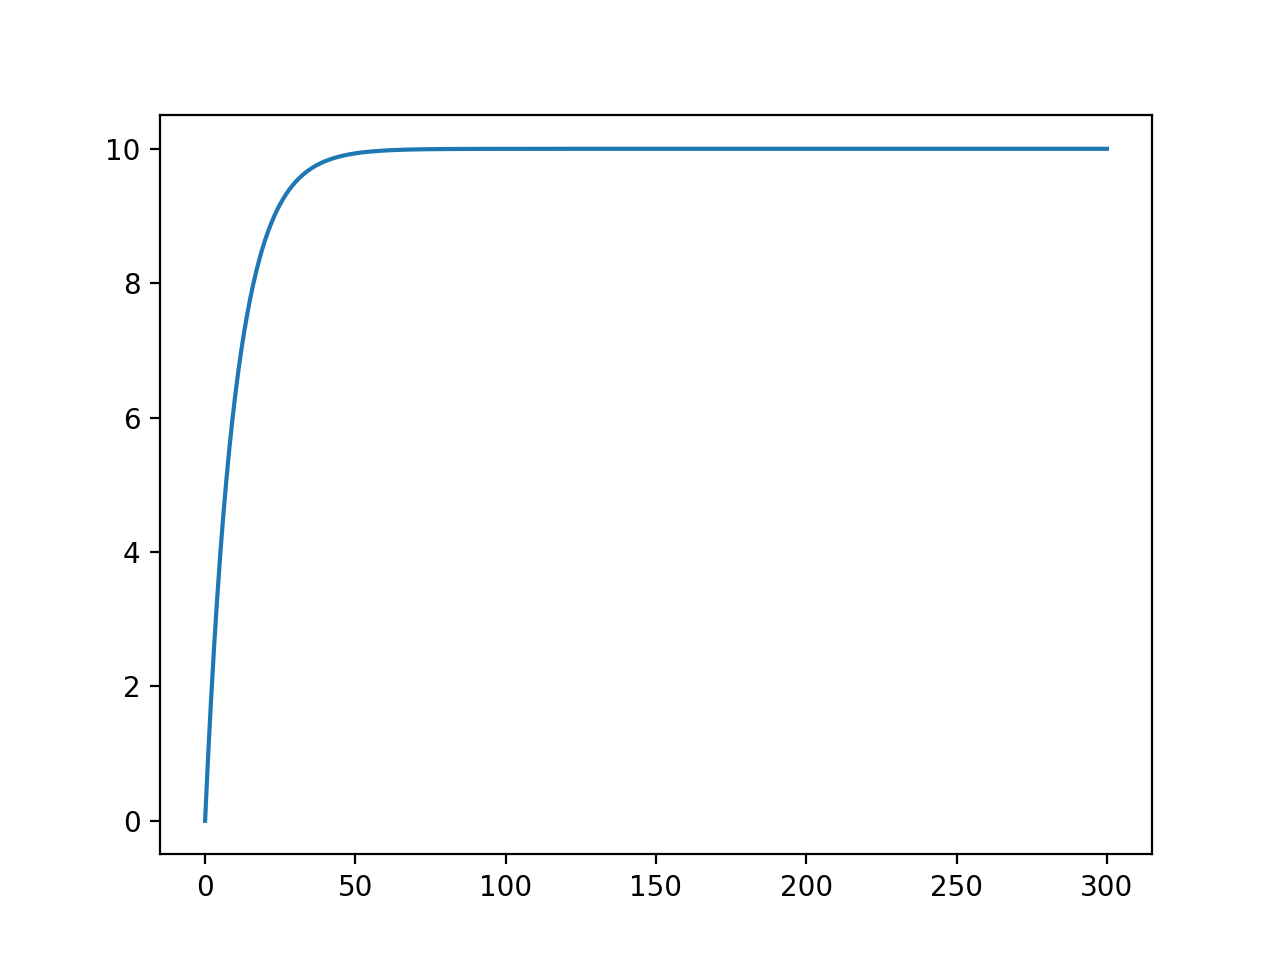

In [32]:
import matplotlib.pyplot as plt
xy = np.linspace(0,300,300)
tau = 10
atarg = 10*(1-np.exp(-xy/tau))
plt.figure()
plt.plot(xy,atarg)
plt.show()